# Bike Sharing Demand (Kaggle)
* 시계열 분석을 통해 자전거 수요 예측
* [Bike Sharing Demand (Kaggle)](https://www.kaggle.com/c/bike-sharing-demand/data)

In [1]:
# 라이브러리 호출

import os
import requests
from io import BytesIO
from itertools import product
from datetime import datetime

# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns

# 분석
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
import statsmodels.api as sm
import pmdarima as pm  

# statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller # 정상성 검정
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings( 'ignore' )

### 1. 데이터 준비

In [61]:
# 데이터 로드
train = pd.DataFrame(pd.read_csv('~/data/data/bike-sharing-demand/train.csv'))
df = train.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**A. datetime 컬럼 전처리**
* year, month, date, hour 단위로 추가 구분

In [64]:
df['year'] = df['datetime'].apply(lambda i: i[0:4])
df['month'] = df['datetime'].apply(lambda i: i[5:7])
df['date'] = df['datetime'].apply(lambda i: i[8:10])
df['hour'] = df['datetime'].apply(lambda i: i[11:13])
df['datetime'] = pd.to_datetime(df['datetime'].apply(lambda i: i[0:10]))
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,date,hour
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04


**B. count 집계 및 시각화**

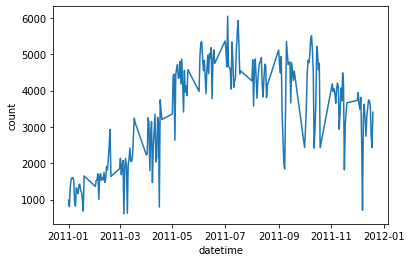

In [65]:
temp = df[df['year']=='2011']

# 집계
temp = temp.groupby(['datetime']).agg({'count':'sum'})

# 시각화
sns.lineplot(data=temp, x='datetime', y='count')
plt.show()

* 결측치가 많아서 분석이 제대로 될지 모르겠음...

**C. 데이터셋 분할**

In [59]:
temp.shape

(228, 1)